# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

## Generate Cities List

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress
from pprint import pprint

# Import API key
from api_keys import weather_api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy



# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

In [2]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

618

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [3]:
url = "http://api.openweathermap.org/data/2.5/weather?"
query_url = url + "appid=" + weather_api_key

In [4]:
cityname = []
cloudiness = []
country = []
date = []
humidity = []
lat = []
lng = []
max_temp = []
wind_speed = []
count = 0
set_counter = 1

for city in cities:
    weather_response = requests.get(query_url + "&q=" + city + "&units=Imperial")
    weather_json = weather_response.json()
     
    try:
        cityname.append(weather_json['name'])
        cloudiness.append(weather_json['clouds']['all'])
        country.append(weather_json['sys']['country'])
        date.append(weather_json['dt'])
        humidity.append(weather_json['main']['humidity'])
        lat.append(weather_json['coord']['lat'])
        lng.append(weather_json['coord']['lon'])
        max_temp.append(weather_json['main']['temp_max'])
        wind_speed.append(weather_json['wind']['speed'])
        
        if count > 49:
            count = 0
            set_counter = set_counter + 1
    
        else:
            count = count + 1
            
        print(f"Processing record {count} of Set {set_counter} | {city}")
        
    except:
        print("Record not found") 
        
       
print("-----------------------------")        
print("Data Retrieval Complete")

Processing record 1 of Set 1 | ushuaia
Processing record 2 of Set 1 | poso
Processing record 3 of Set 1 | nikolskoye
Processing record 4 of Set 1 | whitehorse
Processing record 5 of Set 1 | rikitea
Processing record 6 of Set 1 | saskylakh
Processing record 7 of Set 1 | lompoc
Processing record 8 of Set 1 | chuy
Processing record 9 of Set 1 | kimbe
Processing record 10 of Set 1 | hobart
Record not found
Processing record 11 of Set 1 | kaitangata
Processing record 12 of Set 1 | lavrentiya
Processing record 13 of Set 1 | albany
Processing record 14 of Set 1 | atuona
Processing record 15 of Set 1 | afrikanda
Processing record 16 of Set 1 | takoradi
Processing record 17 of Set 1 | broome
Processing record 18 of Set 1 | busselton
Processing record 19 of Set 1 | bichura
Processing record 20 of Set 1 | nanortalik
Processing record 21 of Set 1 | pringsewu
Processing record 22 of Set 1 | port lincoln
Processing record 23 of Set 1 | hermanus
Processing record 24 of Set 1 | hithadhoo
Processing re

Processing record 42 of Set 4 | sao filipe
Processing record 43 of Set 4 | mazamari
Record not found
Processing record 44 of Set 4 | tambura
Processing record 45 of Set 4 | majene
Processing record 46 of Set 4 | springdale
Processing record 47 of Set 4 | videbaek
Processing record 48 of Set 4 | leningradskiy
Processing record 49 of Set 4 | sangar
Processing record 50 of Set 4 | daru
Processing record 0 of Set 5 | belaya gora
Processing record 1 of Set 5 | namibe
Processing record 2 of Set 5 | eura
Processing record 3 of Set 5 | poopo
Processing record 4 of Set 5 | college
Processing record 5 of Set 5 | port lavaca
Record not found
Record not found
Processing record 6 of Set 5 | sotouboua
Processing record 7 of Set 5 | escanaba
Processing record 8 of Set 5 | aksarka
Processing record 9 of Set 5 | mayor pablo lagerenza
Record not found
Processing record 10 of Set 5 | grand gaube
Processing record 11 of Set 5 | goundam
Processing record 12 of Set 5 | dunedin
Processing record 13 of Set 5 

Processing record 29 of Set 8 | kingsville
Processing record 30 of Set 8 | pimentel
Record not found
Processing record 31 of Set 8 | hailey
Processing record 32 of Set 8 | porto belo
Processing record 33 of Set 8 | indiana
Processing record 34 of Set 8 | hirara
Processing record 35 of Set 8 | bengkulu
Processing record 36 of Set 8 | dzhebariki-khaya
Processing record 37 of Set 8 | kenai
Processing record 38 of Set 8 | coquimbo
Processing record 39 of Set 8 | sorong
Processing record 40 of Set 8 | mpulungu
Processing record 41 of Set 8 | asau
Processing record 42 of Set 8 | acarau
Processing record 43 of Set 8 | iranshahr
Processing record 44 of Set 8 | chimbote
Processing record 45 of Set 8 | clarence town
Processing record 46 of Set 8 | mahibadhoo
Processing record 47 of Set 8 | loiza
Processing record 48 of Set 8 | waipawa
Processing record 49 of Set 8 | zhigansk
Processing record 50 of Set 8 | porbandar
Processing record 0 of Set 9 | tolcayuca
Processing record 1 of Set 9 | redmond


### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [9]:
# Convert array of JSONs into Pandas DataFrame

weather_dict = {"City": cityname,"Latitude": lat, "Longitude":lng,
                "Max Temp":max_temp,"Humidity":humidity,"Cloudiness":cloudiness,
                "Wind Speed":wind_speed,"Country":country, "Date":date}
weather_data = pd.DataFrame(weather_dict)
weather_data.head()


,City,Latitude,Longitude,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Ushuaia,-54.80,-68.30,57.20,58,75,11.41,AR,1604262082
1,Poso,-1.40,120.75,81.00,73,100,4.23,ID,1604262087
2,Nikolskoye,59.70,30.79,32.00,95,90,6.71,RU,1604262087
3,Whitehorse,60.72,-135.05,9.00,77,90,8.05,CA,1604262088
4,Rikitea,-23.12,-134.97,74.55,86,77,22.30,PF,1604262088


In [10]:
# Export the City_Data into a csv
weather_data.to_csv(r'my_weather_data.csv')

## Inspect the data and remove the cities where the humidity > 100%.
----
Skip this step if there are no cities that have humidity > 100%. 

In [11]:
weather_data.count()

City          564
Latitude      564
Longitude     564
Max Temp      564
Humidity      564
Cloudiness    564
Wind Speed    564
Country       564
Date          564
dtype: int64

In [14]:
#  Get the indices of cities that have humidity over 100%.
Index_label = weather_data[weather_data['Humidity']>100].index.tolist() 
print(Index_label)

[]


In [ ]:
# Make a new DataFrame equal to the city data to drop all humidity outliers by index.
# Passing "inplace=False" will make a copy of the city_data DataFrame, which we call "clean_city_data".


## Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

## Latitude vs. Temperature Plot

FileNotFoundError: [Errno 2] No such file or directory: '../Images/City Latitude vs Max Temperature.png'

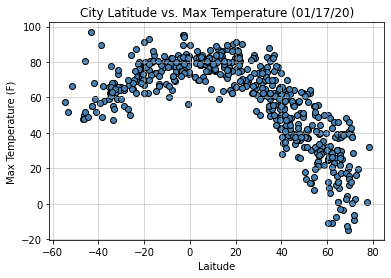

In [16]:
# Create Latitude vs. Temperature Plot scatter plot
plt.scatter(weather_dict["Latitude"], weather_dict["Max Temp"], facecolor = "steelblue", edgecolor = "black")

# Set title
plt.title("City Latitude vs. Max Temperature (01/17/20)")

# Set x axis label
plt.xlabel("Laitude")

# Set y axis label
plt.ylabel("Max Temperature (F)")

# Set grid line
plt.grid(linestyle='-', linewidth=1, alpha = 0.5)

# Save the plotted figure as .pngs
plt.savefig("../Images/City Latitude vs Max Temperature.png")

## Latitude vs. Humidity Plot

In [ ]:
# # Create Latitude vs. Humidity Plot scatter plot
# plt.scatter(weather_dict["Lat"], weather_dict["Humidity"], facecolor = "steelblue", edgecolor = "black")

# # Set title
# plt.title("City Latitude vs. Humidity (01/17/20)")

# # Set x axis label
# plt.xlabel("Laitude")

# # Set y axis label
# plt.ylabel("Humidity (%)")

# # Set grid line
# plt.grid(linestyle='-', linewidth=1, alpha = 0.5)

# # Save the plotted figure as .pngs
# plt.savefig("../Images/City Latitude vs Humidity.png")

## Latitude vs. Cloudiness Plot

In [ ]:

# # Create Latitude vs. Cloudiness Plot scatter plot
# plt.scatter(weather_dict["Lat"], weather_dict["Cloudiness"], facecolor = "steelblue", edgecolor = "black")

# # Set title
# plt.title("City Latitude vs. Cloudiness (01/17/20)")

# # Set x axis label
# plt.xlabel("Laitude")

# # Set y axis label
# plt.ylabel("Cloudiness (%)")

# # Set y axis limit
# plt.ylim(-5,105)

# # Set grid line
# plt.grid(linestyle='-', linewidth=1, alpha = 0.5)

# # Save the plotted figure as .pngs
# plt.savefig("../Images/City Latitude vs Cloudiness.png")

## Latitude vs. Wind Speed Plot

In [ ]:
# # Create Latitude vs. Wind Speed scatter plot
# plt.scatter(weather_dict["Lat"], weather_dict["Wind Speed"], facecolor = "steelblue", edgecolor = "black")
# plt.title("City Latitude vs. Wind Speed (mph) (01/17/20)")

# # Set x axis label
# plt.xlabel("Laitude")

# # Set y axis label
# plt.ylabel("Wind Speed (%)")

# # Set y axis limit
# plt.ylim(-2,50)

# # Set grid line
# plt.grid(linestyle='-', linewidth=1, alpha = 0.5)

# # Save the plotted figure as .pngs
# plt.savefig("../Images/City Latitude vs Wind Speed (mph).png")

## Linear Regression

In [ ]:
# # Create Northern and Southern Hemisphere DataFrames
# northern_hemisphere = weather_dict.loc[weather_dict["Lat"] >= 0]
# southern_hemisphere = weather_dict.loc[weather_dict["Lat"] < 0]

In [ ]:
# # Define function for creating linear agression and scatter plot
# def linear_agression(x,y):
#     print(f"The r-squared is : {round(st.pearsonr(x, y)[0],2)}")
#     (slope, intercept, rvalue, pvalue, stderr) = linregress(x, y)
#     regress_values = x * slope + intercept
#     line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
#     plt.scatter(x, y)
#     plt.plot(x,regress_values,"r-")
#     return line_eq

# # Define a fuction for annotating
# def annotate(line_eq, a, b):
#     plt.annotate(line_eq,(a,b),fontsize=15,color="red")

####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

In [ ]:
# # Call an function #1
# equation = linear_agression(northern_hemisphere["Lat"], northern_hemisphere["Max Temp"])

# # Call an function #2
# annotate(equation, 0, 0)

# # Set a title
# plt.title("Northern Hemisphere - Max Temp vs. Latitude Linear Regression")

# # Set xlabel
# plt.xlabel("Latitude")

# # Set ylabel
# plt.ylabel("Max Temp (F)")

# # Save the figure
# plt.savefig("../Images/Northern Hemisphere - Max Temp vs. Latitude Linear Regression.png")

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

In [ ]:
# # Call an function #1
# equation = linear_agression(southern_hemisphere["Lat"],southern_hemisphere["Max Temp"])

# # Call an function #2
# annotate(equation, -30, 50)

# # Set a title
# plt.title("Southern Hemisphere - Max Temp vs. Latitude Linear Regression")

# # Set xlabel
# plt.xlabel("Latitude")

# # Set ylabel
# plt.ylabel("Max Temp (F)")

# # Save the figure
# plt.savefig("../Images/Southern Hemisphere - Max Temp vs. Latitude Linear Regression.png")

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

In [ ]:
# # Call an function #1
# equation = linear_agression(northern_hemisphere["Lat"], northern_hemisphere["Humidity"])

# # Call an function #2
# annotate(equation, 40, 15)

# # Set a title
# plt.title("Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression")

# # Set xlabel
# plt.xlabel("Latitude")

# # Set ylabel
# plt.ylabel("Humidity (%)")

# # Save the figure
# plt.savefig("../Images/Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression.png")

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

In [ ]:
# # Call an function #1
# equation = linear_agression(southern_hemisphere["Lat"], southern_hemisphere["Humidity"])

# # Call an function #2
# annotate(equation, -40, 50)

# # Set title
# plt.title("Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression")

# # Set xlabel
# plt.xlabel("Latitude")

# # Set ylabel
# plt.ylabel("Humidity (%)")

# # Save the figure
# plt.savefig("../Images/Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression.png")

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

In [ ]:
# # Call an function #1
# equation = linear_agression(northern_hemisphere["Lat"], northern_hemisphere["Cloudiness"])

# # Call an function #2
# annotate(equation, 30, 40)

# # Set a title
# plt.title("Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression")

# # Set xlabel
# plt.xlabel("Latitude")

# # Set ylabel
# plt.ylabel("Cloudiness (%)")

# # Save the figure
# plt.savefig("../Images/Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression.png")

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

In [ ]:
# # Call an function #1
# equation = linear_agression(southern_hemisphere["Lat"], southern_hemisphere["Cloudiness"])

# # Call an function #2
# annotate(equation, -30, 40)

# # Set a title
# plt.title("Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression")

# # Set xlabel
# plt.xlabel("Latitude")

# # Set ylabel
# plt.ylabel("Cloudiness (%)")

# # Save the figure
# plt.savefig("../Images/Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression.png")

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

In [ ]:
# # Call an function #1
# equation = linear_agression(northern_hemisphere["Lat"], northern_hemisphere["Wind Speed"])

# # Call an function #2
# annotate(equation, 40, 20)

# # Set  title
# plt.title("Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression")

# # Set xlabel
# plt.xlabel("Latitude")

# # Set ylabel
# plt.ylabel("Wind Speed (mph)")

# # Save the figure
# plt.savefig("../Images/Northern Hemisphere - Wind Speed vs. Latitude Linear Regression.png")

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

In [ ]:
# # Call an function #1
# equation = linear_agression(southern_hemisphere["Lat"], southern_hemisphere["Wind Speed"])

# # Call an function #2
# annotate(equation, -30, 15)

# # Set  title
# plt.title("Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression")

# # Set xlabel
# plt.xlabel("Latitude")

# # Set ylabel
# plt.ylabel("Wind Speed (mph)")

# # Save the figure
# plt.savefig("../Images/Southern Hemisphere - Wind Speed vs. Latitude Linear Regression.png")